In [4]:
from tensorflow import keras 
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers

from keras.applications import VGG16

In [5]:
based_model = keras.applications.VGG16(include_top=False,
                                      weights='imagenet',
                                      input_shape=(32,32,3))

In [6]:
based_model.summary()
from contextlib import redirect_stdout

with open('base_conv.txt', 'w') as f:
    with redirect_stdout(f):
        based_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [8]:
model = models.Sequential()
model.add(based_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()
with open('clas_vgg16.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full = X_train_full.reshape((60000, 28,28,1))
X_train_full = X_train_full.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28,1))
X_test = X_test.astype('float32') / 255

In [11]:
X_train_full = tf.image.resize(X_train_full, [32,32])
X_test = tf.image.resize(X_test, [32,32])

In [12]:
X_train_full = np.concatenate((X_train_full, X_train_full, X_train_full), axis=3)
X_test = np.concatenate((X_test,X_test,X_test), axis=3)

In [13]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [35]:
X_test.shape

(10000, 32, 32, 3)

In [17]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [21]:
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=20,
                   validation_data=(X_valid, y_valid))

Epoch 1/10
2750/2750 [==============================] - 200s 73ms/step - loss: 0.3730 - acc: 0.8654 - val_loss: 0.3101 - val_acc: 0.8840
Epoch 2/10
2750/2750 [==============================] - 200s 73ms/step - loss: 0.2523 - acc: 0.9110 - val_loss: 0.2509 - val_acc: 0.9084
Epoch 3/10
2750/2750 [==============================] - 200s 73ms/step - loss: 0.2270 - acc: 0.9224 - val_loss: 0.2633 - val_acc: 0.9110
Epoch 4/10
2750/2750 [==============================] - 205s 75ms/step - loss: 0.2285 - acc: 0.9229 - val_loss: 0.3252 - val_acc: 0.9164
Epoch 5/10
2750/2750 [==============================] - 205s 75ms/step - loss: 0.2404 - acc: 0.9207 - val_loss: 0.2616 - val_acc: 0.9134
Epoch 6/10
2750/2750 [==============================] - 206s 75ms/step - loss: 0.2758 - acc: 0.9176 - val_loss: 0.2843 - val_acc: 0.9014
Epoch 7/10
2750/2750 [==============================] - 205s 75ms/step - loss: 0.2927 - acc: 0.9128 - val_loss: 0.2656 - val_acc: 0.9168
Epoch 8/10
2750/2750 [===================

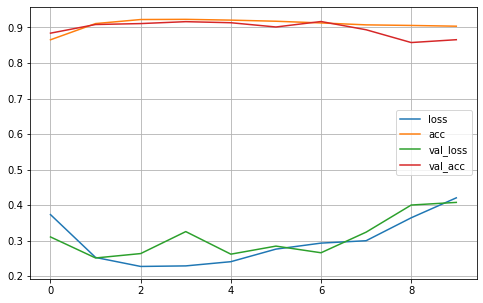

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.savefig('VGG16_1.png')

In [23]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
import seaborn as sns

In [39]:
predictions = model.predict(X_test)
predictions = tf.argmax(predictions, axis=-1)
cm = tf.math.confusion_matrix(y_test, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

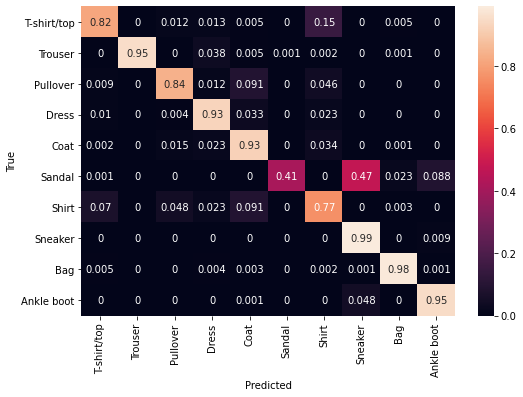

In [41]:
sns.heatmap(
    cm, annot = True,
    xticklabels=labels,
    yticklabels=labels)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('True')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("VGG16_heatmap.png", dpi = 100)

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 1.1768 - acc: 0.8570
test_acc:  0.8569999933242798
